# Importing libraries

In [23]:
import numpy as np
import math
import time
import matplotlib.pyplot as plt

In [24]:
#initial values
sd = 5
mean = 1

In [25]:
# generating random samples using normal distribution
samples = np.random.normal(10,5,50)
mean_samples = np.mean(samples)
print(samples)

[14.22055592  8.63775756 -1.15348037  9.42877393  6.8821762  19.18463819
  4.2422333  13.0862362   8.28664753 -3.14313709 11.7196559   5.16189376
 10.71545537  5.22514296 13.26509626  7.66925115  8.35943188  4.51819686
  5.79616112  6.74698045 18.51671271  1.62429214  9.45347962 13.87736302
 -0.76586152 10.0787222   6.97392791 11.05588768  7.90905423 12.60407392
  9.11019624 16.52271688  7.88339288 12.41391964  7.3146468  18.77902339
 15.47169665  1.3070336   6.2498528   7.62090784  7.88737405 10.76618566
 12.35774807  2.45700502 10.25780872 16.9570416   5.43173434 12.1571132
  9.33893673 12.24857674]


In [26]:
# this function finds the normal distribution probablity
def normpdf(x, mean, sd):
    var = float(sd)**2
    denom = (2*math.pi*var)**.5
    num = math.exp(-(float(x)-float(mean))**2/(2*var))
    return num/denom

In [27]:
# this function finds the posterior given mean and sd
def find_posterior(mean, sd):
    prior = normpdf(mean,25,5)
    likelihood = normpdf(mean_samples,sd,0.7)
    # print("prior",prior)
    # print("likelihood",likelihood)
    return prior*likelihood

In [32]:
def metropolis_algo(mean, sd, epochs=1000):
    start = time.time()
    mean_list = []
    mean_old = mean
    mean_list.append(mean_old)
    for i in range(epochs):
        mean_before = np.mean(mean_list)
        # print("mean before",mean_before)
        mean_new = np.random.normal(mean,sd)
        # print(mean_old,mean_new)
        old_posterior = find_posterior(mean_old, sd)
        new_posterior = find_posterior(mean_new, sd)
        # print("old posterior",old_posterior)
        # print("new posterior",new_posterior)
        if old_posterior!=0:
            r = new_posterior/old_posterior
            rand_No = np.random.ranf()
            if r<rand_No:
                mean_old = mean_new
                mean_list.append(mean_old)
                mean_after = np.mean(mean_list)
                # print("mean after",mean_after)
                if float(abs(mean_after - mean_before)) < 0.0000001:
                    # print("converged in iterations",i)
                    break
    time_taken = time.time() - start
    return [mean_list,time_taken]


In [33]:
mean_list = metropolis_algo(mean,sd)[0]

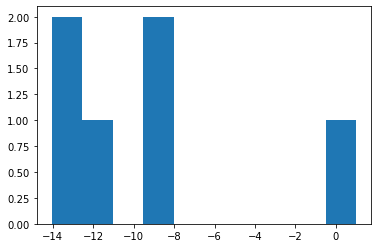

In [34]:
plt.hist(mean_list)
plt.show()

# Q 2(C)

In [22]:
sd_list = [i for i in range(1,50)]
t = []
min_time = np.inf
best_sd = 1
for i in sd_list:
    time_taken = metropolis_algo(mean,i)[1]
    t.append(time_taken)
    if time_taken<min_time:
        min_time = time_taken
        best_sd = i

mean before 1.0
1 -0.7002370152069288
old posterior 1.0266840509420662e-43
new posterior 1.894349828314008e-44
random no is 0.2329664732879888
i am here
mean after 0.1498814923965356
mean before 0.1498814923965356
-0.7002370152069288 1.8857688445883003
old posterior 1.894349828314008e-44
new posterior 2.3654791522416738e-43
random no is 0.202977265411721
mean before 0.1498814923965356
-0.7002370152069288 0.5774047193045773
old posterior 1.894349828314008e-44
new posterior 6.818613342789006e-44
random no is 0.24828135759926662
mean before 0.1498814923965356
-0.7002370152069288 1.5725273782123717
old posterior 1.894349828314008e-44
new posterior 1.7672148425875347e-43
random no is 0.6465931936451205
mean before 0.1498814923965356
-0.7002370152069288 0.6762241738304744
old posterior 1.894349828314008e-44
new posterior 7.508216281150342e-44
random no is 0.5874579450254886
mean before 0.1498814923965356
-0.7002370152069288 1.0531525835981679
old posterior 1.894349828314008e-44
new posterior

KeyboardInterrupt: 

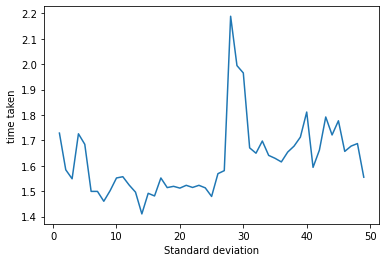

In [ ]:
plt.plot(sd_list,t)
plt.xlabel("Standard deviation")
plt.ylabel("time taken")
plt.show()

In [ ]:
print("Optimal width is",best_sd)

Optimal width is 14


consequences of using sub-optimal proposal width and terminating sampling too soon

In [ ]:
# using sub optimal sd
sd1 = best_sd+1
mean_list = metropolis_algo(mean, sd1, 100)

mean before 1.0
prior 0.01079819330263761
likelihood 0.0
prior 0.01079819330263761
likelihood 0.0
old posterior 0.0
new posterior 0.0
mean before 1.0
prior 0.01079819330263761
likelihood 0.0
prior 0.01079819330263761
likelihood 0.0
old posterior 0.0
new posterior 0.0
mean before 1.0
prior 0.01079819330263761
likelihood 0.0
prior 0.01079819330263761
likelihood 0.0
old posterior 0.0
new posterior 0.0
mean before 1.0
prior 0.01079819330263761
likelihood 0.0
prior 0.01079819330263761
likelihood 0.0
old posterior 0.0
new posterior 0.0
mean before 1.0
prior 0.01079819330263761
likelihood 0.0
prior 0.01079819330263761
likelihood 0.0
old posterior 0.0
new posterior 0.0
mean before 1.0
prior 0.01079819330263761
likelihood 0.0
prior 0.01079819330263761
likelihood 0.0
old posterior 0.0
new posterior 0.0
mean before 1.0
prior 0.01079819330263761
likelihood 0.0
prior 0.01079819330263761
likelihood 0.0
old posterior 0.0
new posterior 0.0
mean before 1.0
prior 0.01079819330263761
likelihood 0.0
prior

[]

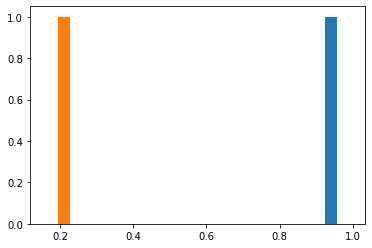

In [ ]:
plt.hist(mean_list)
plt.plot()